In [1]:
pip install --upgrade pip


     ---------------------------------------- 2.1/2.1 MB 16.4 MB/s eta 0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 23.0.1
    Uninstalling pip-23.0.1:
      Successfully uninstalled pip-23.0.1
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install torch

Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install torch-sparse -f https://data.pyg.org/whl/torch-1.11.0+cu113.html
!pip install torch-scatter -f https://data.pyg.org/whl/torch-1.11.0+cu113.html
!pip install torch-geometric


Looking in links: https://data.pyg.org/whl/torch-1.11.0+cu113.html
  Using cached torch_sparse-0.6.17.tar.gz (209 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for torch-sparse
Failed to build torch-sparse


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [55 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-3.9
      creating build\lib.win-amd64-3.9\torch_sparse
      copying torch_sparse\add.py -> build\lib.win-amd64-3.9\torch_sparse
      copying torch_sparse\bandwidth.py -> build\lib.win-amd64-3.9\torch_sparse
      copying torch_sparse\cat.py -> build\lib.win-amd64-3.9\torch_sparse
      copying torch_sparse\coalesce.py -> build\lib.win-amd64-3.9\torch_sparse
      copying torch_sparse\convert.py -> build\lib.win-amd64-3.9\torch_sparse
      copying torch_sparse\diag.py -> build\lib.win-amd64-3.9\torch_sparse
      copying torch_sparse\eye.py -> build\lib.win-amd64-3.9\torch_sparse
      copying torch_sparse\index_select.py -> build\lib.win-amd64-3.9\torch_sparse
      copying torch_sparse\masked_select.py -> build\lib.wi

Looking in links: https://data.pyg.org/whl/torch-1.11.0+cu113.html
  Using cached torch_scatter-2.1.1.tar.gz (107 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for torch-scatter
Failed to build torch-scatter


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [32 lines of output]
      running bdist_wheel
      running build
      running build_py
      creating build
      creating build\lib.win-amd64-3.9
      creating build\lib.win-amd64-3.9\torch_scatter
      copying torch_scatter\placeholder.py -> build\lib.win-amd64-3.9\torch_scatter
      copying torch_scatter\scatter.py -> build\lib.win-amd64-3.9\torch_scatter
      copying torch_scatter\segment_coo.py -> build\lib.win-amd64-3.9\torch_scatter
      copying torch_scatter\segment_csr.py -> build\lib.win-amd64-3.9\torch_scatter
      copying torch_scatter\testing.py -> build\lib.win-amd64-3.9\torch_scatter
      copying torch_scatter\utils.py -> build\lib.win-amd64-3.9\torch_scatter
      copying torch_scatter\__init__.py -> build\lib.win-amd64-3.9\torch_scatter
      creating build\lib.win-amd64-3.9\torch_scatter\composite
      copying torch_scatter\composite\log

In [14]:

import torch
import networkx as nx
import matplotlib.pyplot as plt

In [1]:
from torch_geometric.datasets import KarateClub

In [2]:
dataset = KarateClub()

In [4]:
print(f'Dataset: {dataset}:')

print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')
print(f'Number of Node Features: {dataset.num_node_features}')
print(f'Number of Edge Features: {dataset.num_edge_features}')

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4
Number of Node Features: 34
Number of Edge Features: 0


In [5]:
data = dataset[0]  # Get the first graph object.

print(data)

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])


In [9]:

print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Has isolated nodes: {data.has_isolated_nodes()}')
print(f'Has self-loops: {data.has_self_loops()}')
print(f'Is Directed: {data.is_directed()}')
print(f'Is undirected: {data.is_undirected()}')
print(f'Edge weight: {data.edge_weight}')
     

Number of nodes: 34
Number of edges: 156
Average node degree: 4.59
Has isolated nodes: False
Has self-loops: False
Is Directed: False
Is undirected: True
Edge weight: None


In [11]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))
edge_index = data.edge_index

<IPython.core.display.Javascript object>

In [15]:
def visualize_graph(G, color):
    plt.figure(figsize=(12,12))
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                     node_color=color, cmap="Set2")
    plt.show()

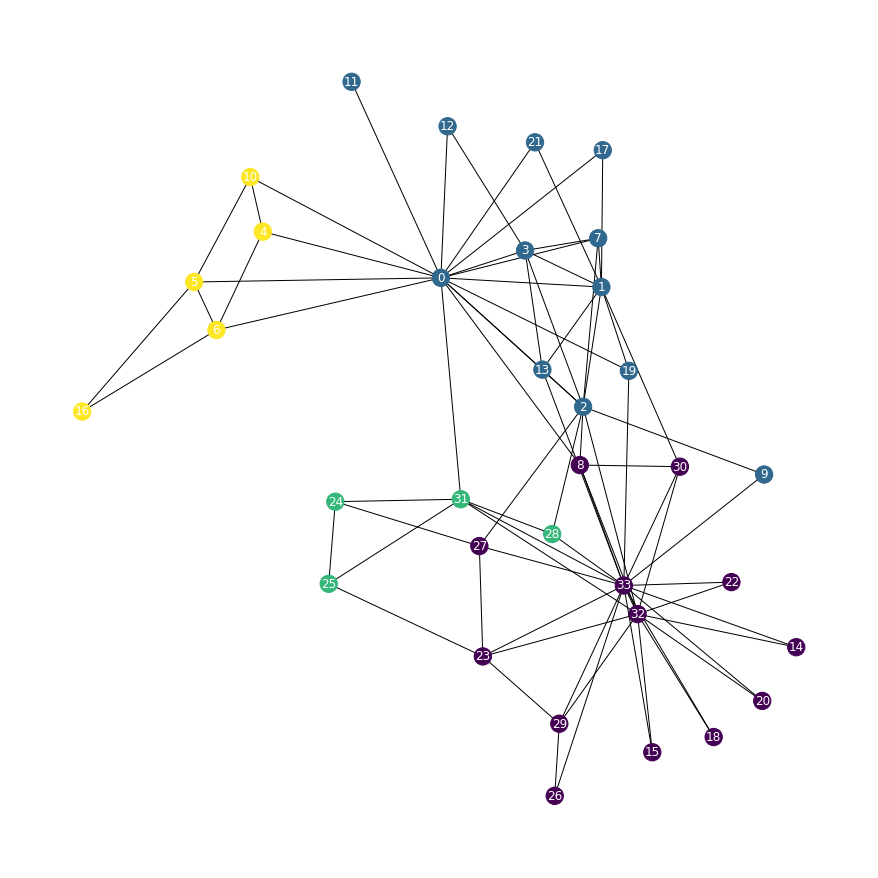

In [18]:
from torch_geometric.utils import to_networkx
plt.figure(figsize=(12,12))
nx.draw(karate_undirected_graph, cmap=plt.get_cmap('viridis'), with_labels=True, node_color=data.y, font_color='white')

In [30]:
dataset.num_features

34

In [47]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 4)
        self.conv3 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()  # Final GNN embedding space.
        
        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


In [48]:
model = GCN()

_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')
     

Embedding shape: [34, 2]


In [49]:
def visualize_embedding(h, color, epoch=None, loss=None):
    plt.figure(figsize=(12,8))
    plt.xticks([])
    plt.yticks([])
    h = h.detach().cpu().numpy()
    plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
    if epoch is not None and loss is not None:
        plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    plt.show()

In [50]:
import time
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

<IPython.core.display.Javascript object>

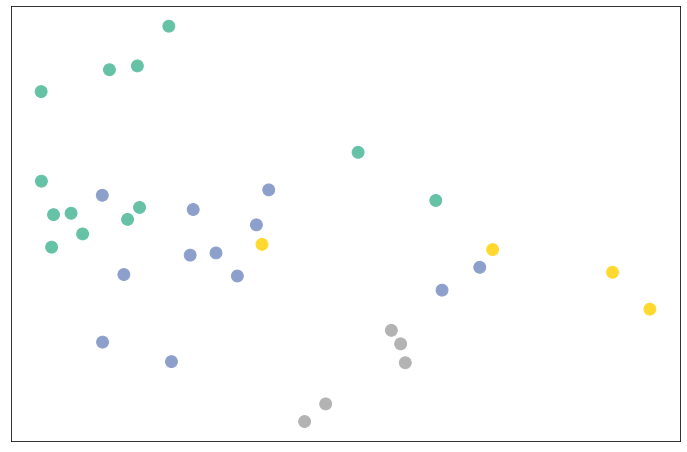

In [51]:
visualize_embedding(h, color=data.y)

In [52]:
model.parameters

<bound method Module.parameters of GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)>

In [53]:
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.
optimizer

Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    capturable: False
    differentiable: False
    eps: 1e-08
    foreach: None
    fused: None
    lr: 0.01
    maximize: False
    weight_decay: 0
)

In [54]:
def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h

In [ ]:
for epoch in range(201):
    loss, h = train(data)
    if epoch % 10 == 0:
        visualize_embedding(h, color=data.y, epoch=epoch, loss=loss)
        time.sleep(0.3)
        ## Added by Me
        final_h = h

In [61]:
from sklearn.manifold import TSNE

def visualize_tsne(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

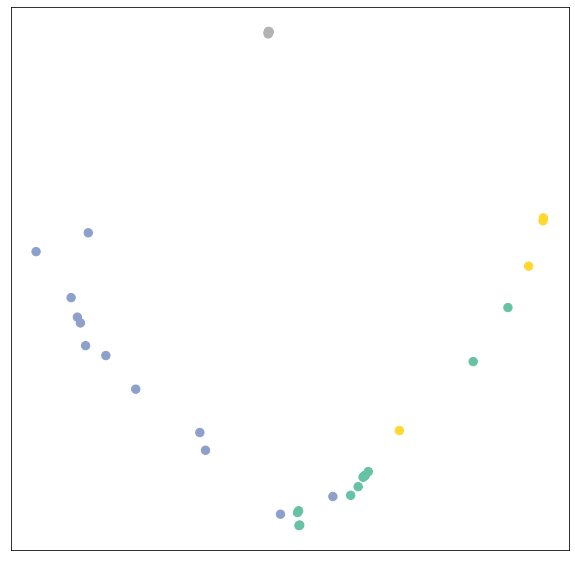

In [63]:

visualize_tsne(h, color=data.y)

In [64]:
from torch_geometric.data import download_url, extract_zip

url = 'https://files.grouplens.org/datasets/movielens/ml-latest-small.zip'
extract_zip(download_url(url, '.'), '.')

movie_path = './ml-latest-small/movies.csv'
rating_path = './ml-latest-small/ratings.csv'

Extracting .\ml-latest-small.zip


In [65]:
import pandas as pd

print(pd.read_csv(movie_path).head())
print(pd.read_csv(rating_path).head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


In [66]:
import torch

def load_node_csv(path, index_col, encoders=None, **kwargs):
    df = pd.read_csv(path, index_col=index_col, **kwargs)
    mapping = {index: i for i, index in enumerate(df.index.unique())}

    x = None
    if encoders is not None:
        xs = [encoder(df[col]) for col, encoder in encoders.items()]
        x = torch.cat(xs, dim=-1)

    return x, mapping

In [67]:
pip install sentence-transformers

     ---------------------------------------- 86.0/86.0 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.0/7.0 MB 29.5 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 38.2 MB/s eta 0:00:00
     ------------------------------------- 977.8/977.8 kB 60.5 MB/s eta 0:00:00
     ---------------------------------------- 224.5/224.5 kB ? eta 0:00:00
     ---------------------------------------- 154.0/154.0 kB ? eta 0:00:00
     ---------------------------------------- 3.5/3.5 MB 31.5 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125956 sha256=73e75d729985c25f4d336dc140a69513ad1acc9760a2f4526ca21f814e7d916d
  Stored in directory: c:\users\locda\appdata\local\pip\cache\wheels\71\67\06\162a3760c40d74dd40bc855d527008d26341c2b0ecf3e8e11f
Successfully built sentence-transformers


In [84]:
from sentence_transformers import SentenceTransformer

In [85]:
class SequenceEncoder(object):
    def __init__(self, model_name='all-MiniLM-L6-v2', device=None):
        self.device = device
        self.model = SentenceTransformer(model_name, device=device)

    @torch.no_grad()
    def __call__(self, df):
        x = self.model.encode(df.values, show_progress_bar=True,
                              convert_to_tensor=True, device=self.device)
        return x.cpu()

In [86]:
class GenresEncoder(object):
    def __init__(self, sep='|'):
        self.sep = sep

    def __call__(self, df):
        genres = set(g for col in df.values for g in col.split(self.sep))
        mapping = {genre: i for i, genre in enumerate(genres)}

        x = torch.zeros(len(df), len(mapping))
        for i, col in enumerate(df.values):
            for genre in col.split(self.sep):
                x[i, mapping[genre]] = 1
        return x

In [87]:
movie_x, movie_mapping = load_node_csv(
    movie_path, index_col='movieId', encoders={
        'title': SequenceEncoder(),
        'genres': GenresEncoder()
    })

Batches: 100%|██████████| 305/305 [00:15<00:00, 19.36it/s]


In [88]:
_, user_mapping = load_node_csv(rating_path, index_col='userId')

In [94]:
from torch_geometric.data import HeteroData

data = HeteroData()

data['user'].num_nodes = len(user_mapping)  # Users do not have any features.
data['movie'].x = movie_x

print(data)
HeteroData(
  user={ num_nodes=610 },
  movie={ x[9742, 404] }
)

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (<ipython-input-94-cc9ddf41d74e>, line 10)

In [95]:
data

HeteroData(
  user={ num_nodes=610 },
  movie={ x=[9742, 404] }
)

In [90]:
def load_edge_csv(path, src_index_col, src_mapping, dst_index_col, dst_mapping,
                  encoders=None, **kwargs):
    df = pd.read_csv(path, **kwargs)

    src = [src_mapping[index] for index in df[src_index_col]]
    dst = [dst_mapping[index] for index in df[dst_index_col]]
    edge_index = torch.tensor([src, dst])

    edge_attr = None
    if encoders is not None:
        edge_attrs = [encoder(df[col]) for col, encoder in encoders.items()]
        edge_attr = torch.cat(edge_attrs, dim=-1)

    return edge_index, edge_attr

In [91]:
class IdentityEncoder(object):
    def __init__(self, dtype=None):
        self.dtype = dtype

    def __call__(self, df):
        return torch.from_numpy(df.values).view(-1, 1).to(self.dtype)

In [92]:
edge_index, edge_label = load_edge_csv(
    rating_path,
    src_index_col='userId',
    src_mapping=user_mapping,
    dst_index_col='movieId',
    dst_mapping=movie_mapping,
    encoders={'rating': IdentityEncoder(dtype=torch.long)},
)

data['user', 'rates', 'movie'].edge_index = edge_index
data['user', 'rates', 'movie'].edge_label = edge_label

print(data)
HeteroData(
  user={ num_nodes=610 },
  movie={ x=[9742, 404] },
  (user, rates, movie)={
    edge_index=[2, 100836],
    edge_label=[100836, 1]
  }
)

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (<ipython-input-92-124a4b54405c>, line 15)

In [96]:
plt.figure(figsize=(12,12))
nx.draw(HeteroData, cmap=plt.get_cmap('viridis'), with_labels=True, node_color=data.y, font_color='white')

AttributeError: 'HeteroData' has no attribute 'y'

<Figure size 864x864 with 0 Axes>

In [102]:
from torch_geometric.datasets import TUDataset
dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES')

Extracting \tmp\ENZYMES\ENZYMES\ENZYMES.zip
Processing...
Done!


In [103]:
data = dataset[0]

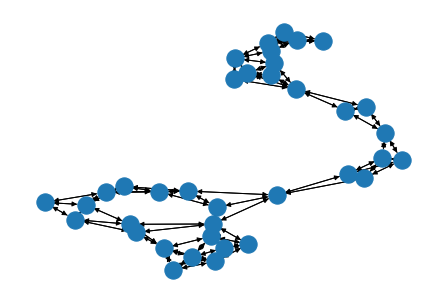

In [104]:
import networkx as nx
networkX_graph = to_networkx(data)
nx.draw(networkX_graph)

In [105]:
from torch_geometric.datasets import Planetoid
cora_dataset = Planetoid(root='tmp/Cora', name='Cora')

Processing...
Done!


In [133]:
class GCN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        torch.manual_seed(1234)
        self.conv1 = GCNConv(cora_dataset.num_features, 4)
        self.conv2 = GCNConv(4, 4)
        self.conv3 = GCNConv(4, 2)
        self.classifier = Linear(2, cora_dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()  # Final GNN embedding space.
        
        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(1433, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=7, bias=True)
)


In [134]:
c_ds = cora_dataset[0]


In [135]:
model = GCN()

_, h = model(c_ds.x, c_ds.edge_index)
print(f'Embedding shape: {list(h.shape)}')
     
     

Embedding shape: [2708, 2]


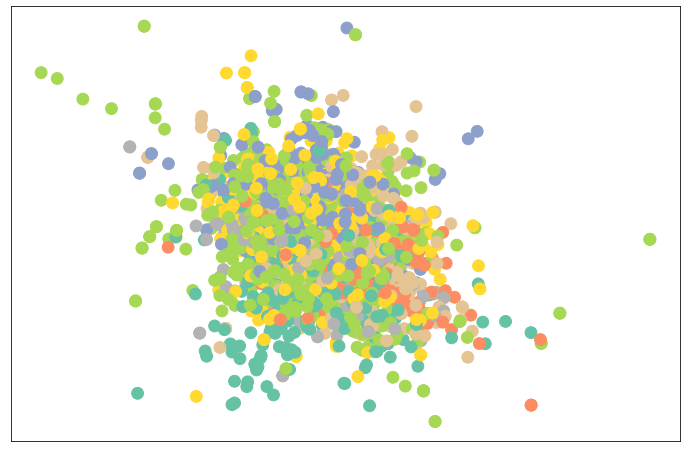

In [136]:
visualize_embedding(h, color=c_ds.y)

In [137]:
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

In [138]:
def train(c_ds):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(c_ds.x, c_ds.edge_index)  # Perform a single forward pass.
    loss = criterion(out[c_ds.train_mask], c_ds.y[c_ds.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h

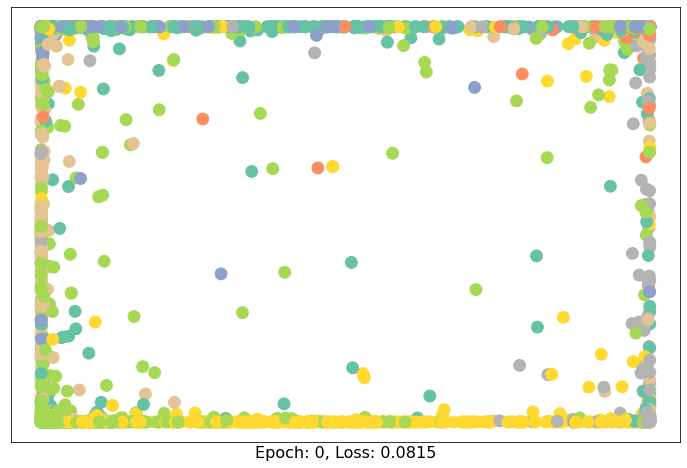

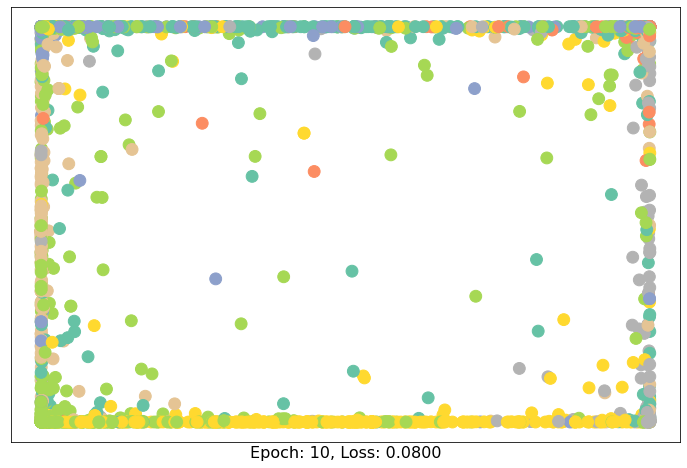

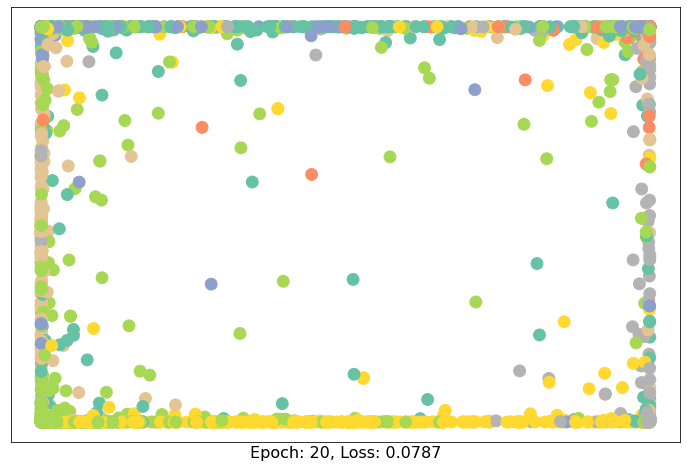

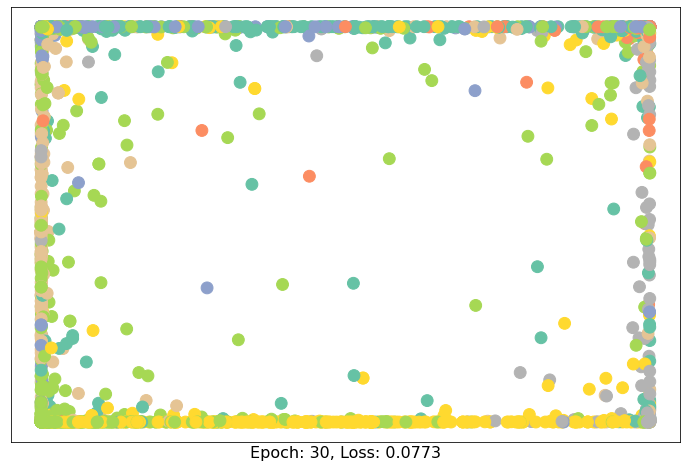

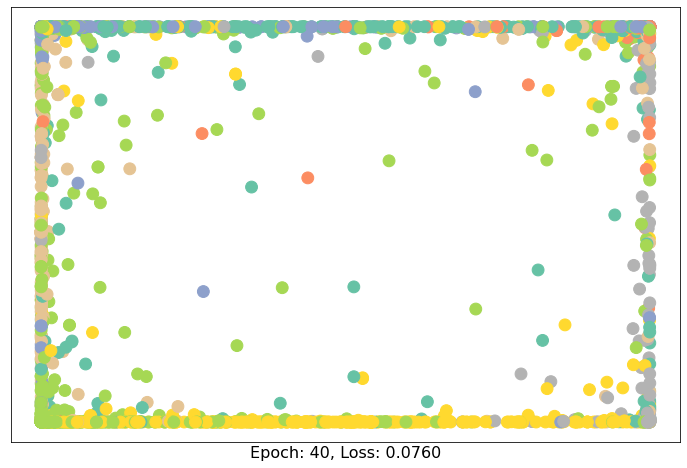

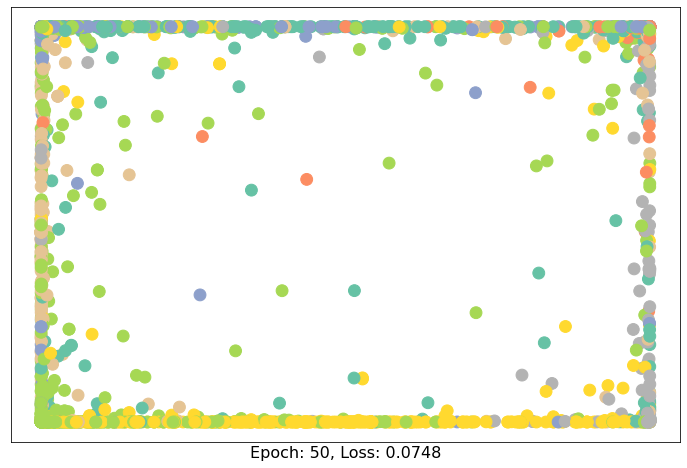

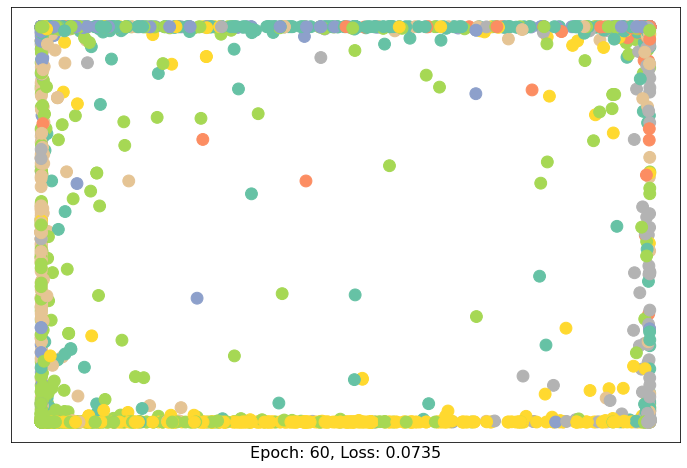

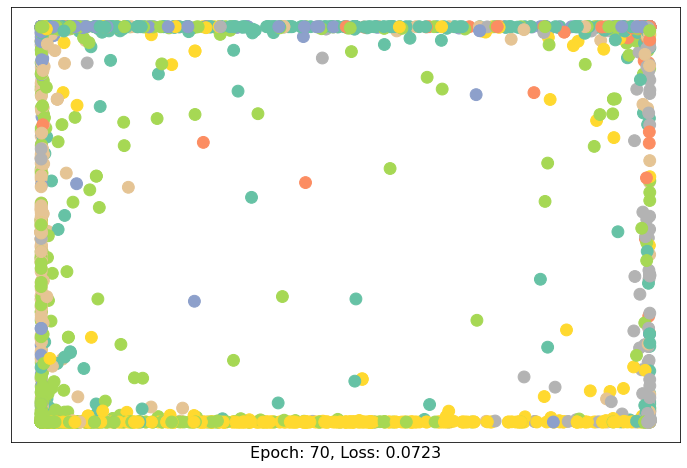

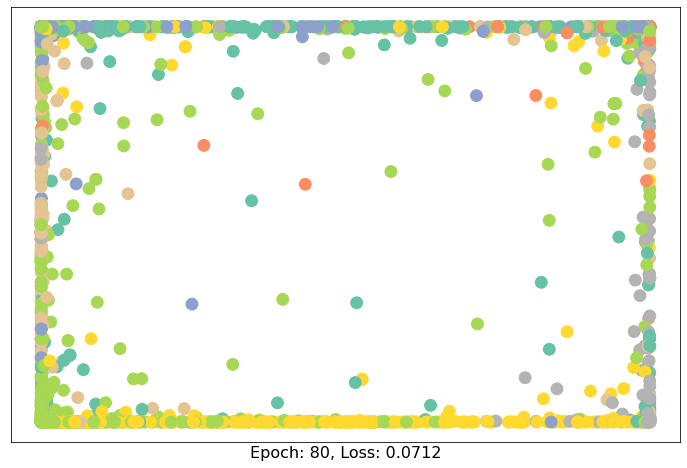

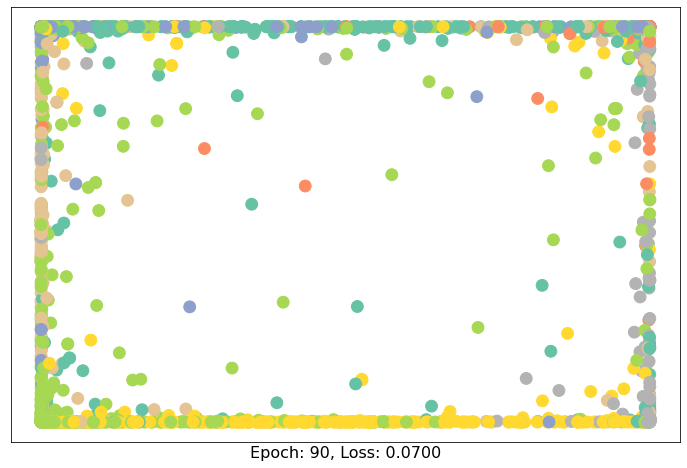

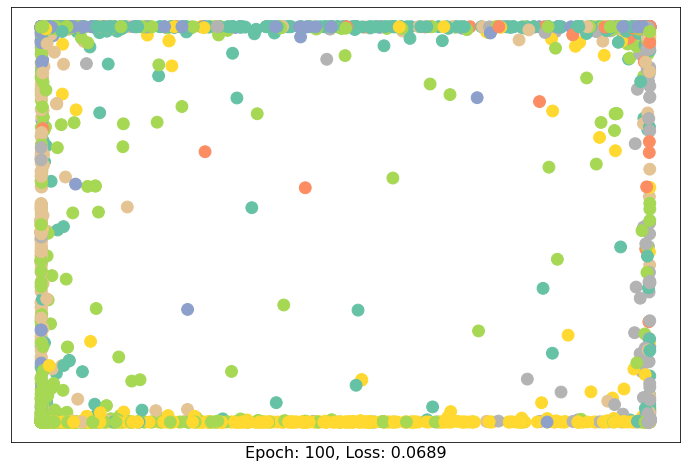

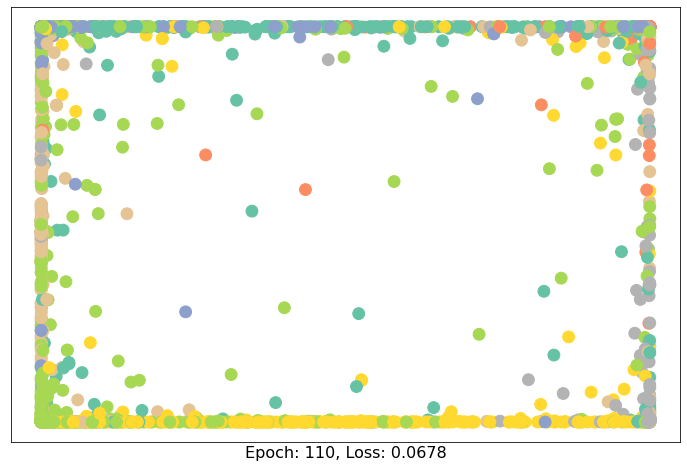

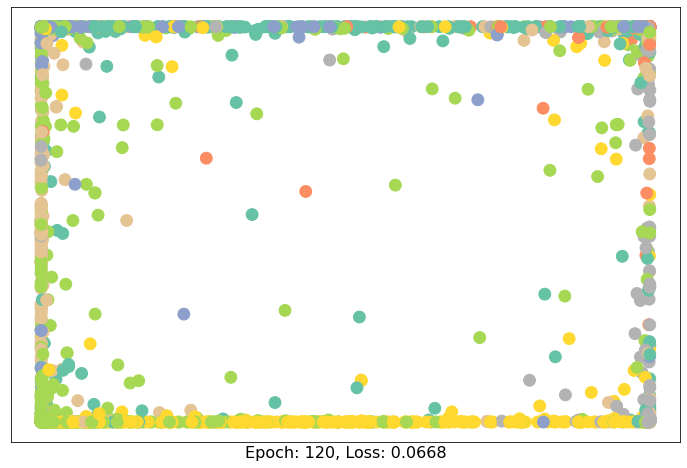

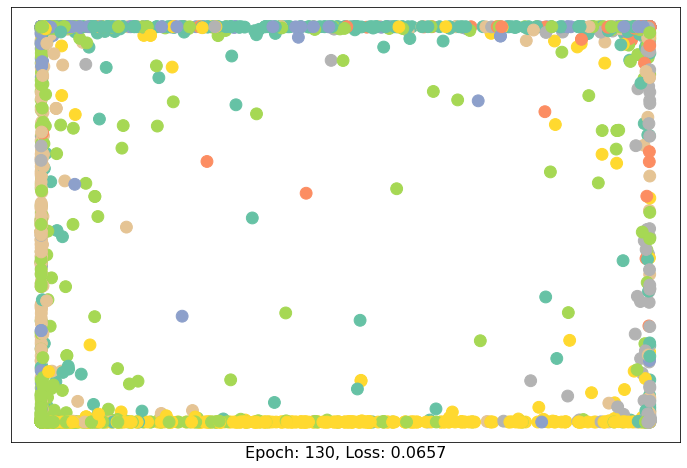

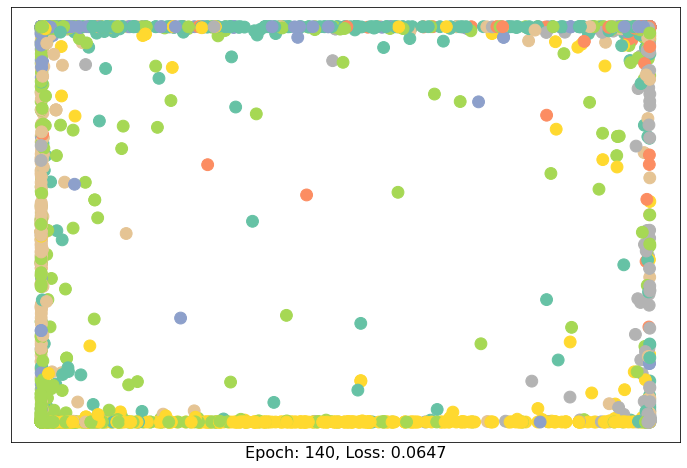

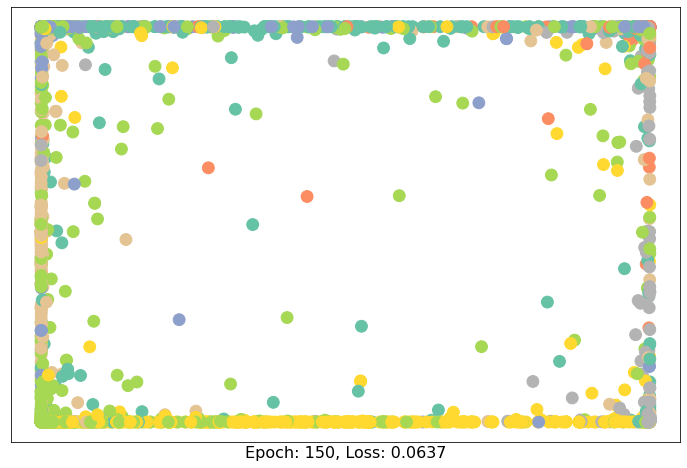

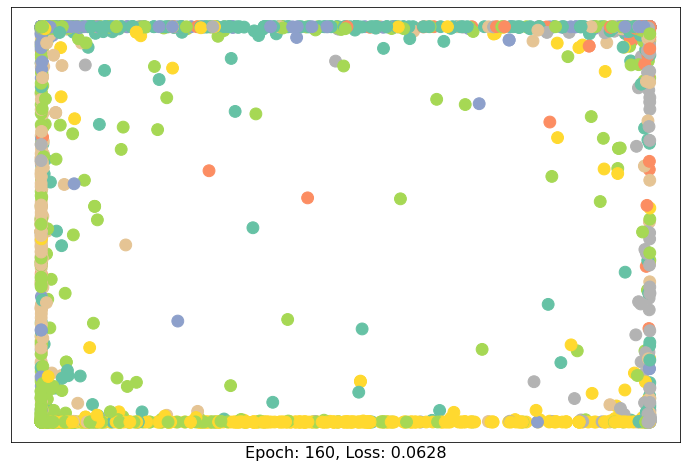

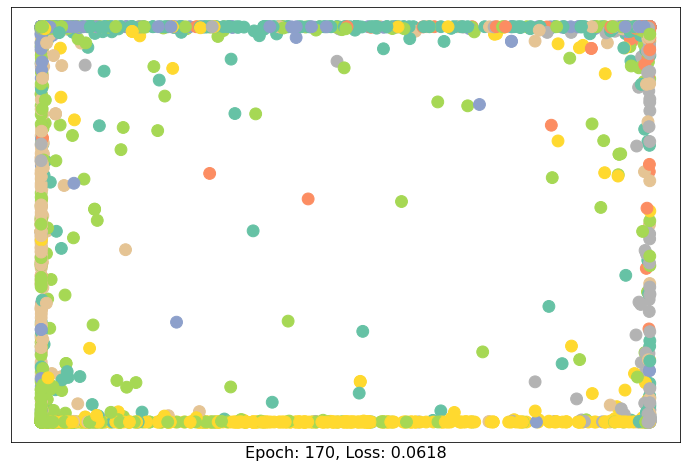

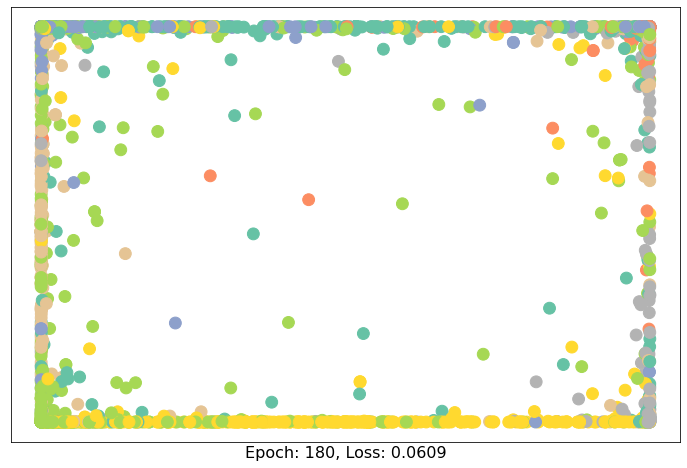

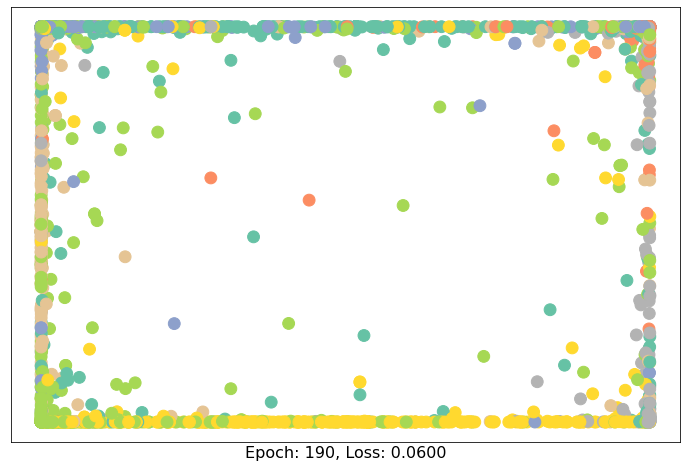

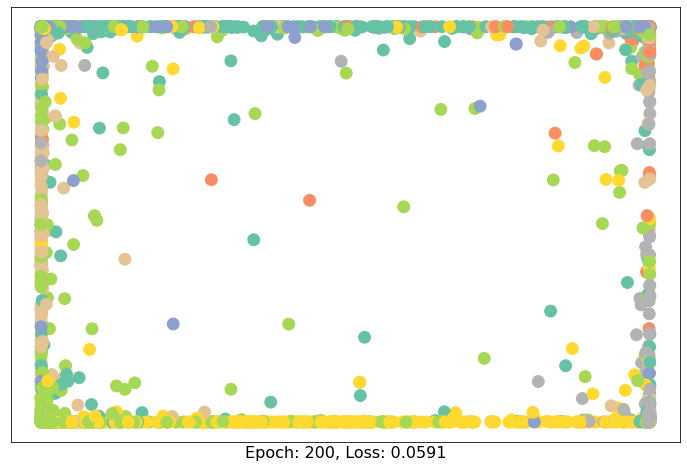

In [149]:
for epoch in range(201):
    loss, h = train(c_ds)
    if epoch % 10 == 0:
        visualize_embedding(h, color=c_ds.y, epoch=epoch, loss=loss)
        time.sleep(0.3)
        ## Added by Me
        final_h = h

In [145]:
cora_undirected_graph = to_networkx(c_ds)


In [146]:
def visualize_graph(G, color):
    plt.figure(figsize=(12,12))
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                     node_color=color, cmap="Set2")
    plt.show()

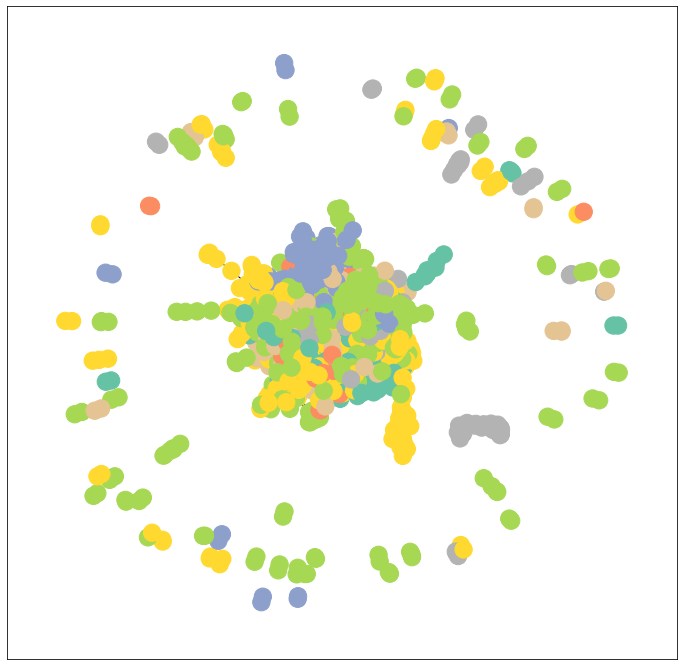

In [147]:
from torch_geometric.utils import to_networkx
cora = to_networkx(c_ds, to_undirected=True)
visualize_graph(cora, color=c_ds.y)

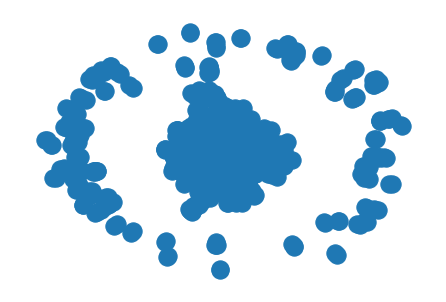

In [144]:
nx.draw(to_networkx(c_ds, to_undirected=True))